# SPAMBASE 

## 1)DEFINING THE QUESTION

### Specifying the Question

Build a spam classifier model to tell whether a message is spam or not.

###### DATASET

Each row of this dataset is a set of features measured for a specific email and an additional column telling whether the mail is spam or non-spam, class is the target variables. spam(1) , not spam(0)

### Defining metric for success

To achieve our objective;

Modelling to predict if a mail is spam or not The algorithm I'll put into consideration is:

i) Baseline Model at 80%

ii) Naive bayes where I aim for an 80% accuracy of the model.

### Understanding the context

Spam are irrelevant messages sent over the Internet, typically to a large number of users, for the purposes of advertising.
They are sent for commercial purposes.One disadvantage of spam emails is that it can be a malicious attempt to gain access to your computer.Machine learningalgorithmns such as Deep Learning, Naïve Bayes, Support Vector Machines, Neural Networks, etc, can be used to identify whether an email is spam or not.


### Recording experimental design

steps taken to tackle the project

i) Loading the data

ii) Data cleaning

iii) Modelling

vi) conclusion

## 2) Load and Study the data

In [112]:
#import basic libraries
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv('spambase.csv')

In [114]:
#first five records
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [115]:
#shape of the data
df.shape

(4601, 58)

The dataframe has 4,601 rows and 58 columns.

In [116]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

No null values, most attributes are floats , capital_run... are integers

In [6]:
#checking for missing values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

The dataset has no null values which is pretty good.

### column description

Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.

1) The run-length attributes ie ,capital_run_length_average, capital_run_length_longest, capital_run_length_total, measure the length of sequences of consecutive capital letters.

Statistical measure for each attribute:

2) Attributes of type word_freq_WORD [0,100]. Percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

3) Attributes of type char_freq_CHAR [0,100]
   percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
   
4) Attribute of type capital_run_length_average. Average length of uninterrupted sequences of capital letters

5) Attribute of type capital_run_length_longest. Length of longest uninterrupted sequence of capital letters

6) Attribute of type capital_run_length_total. Sum of length of uninterrupted sequences of capital letters
   total number of capital letters in the e-mail.
   
***1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0)***

In [48]:
df['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

spam emails have a count of 1813 , not spam emails have a count of 2788

<ipython-input-133-eaeec98c0a28>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


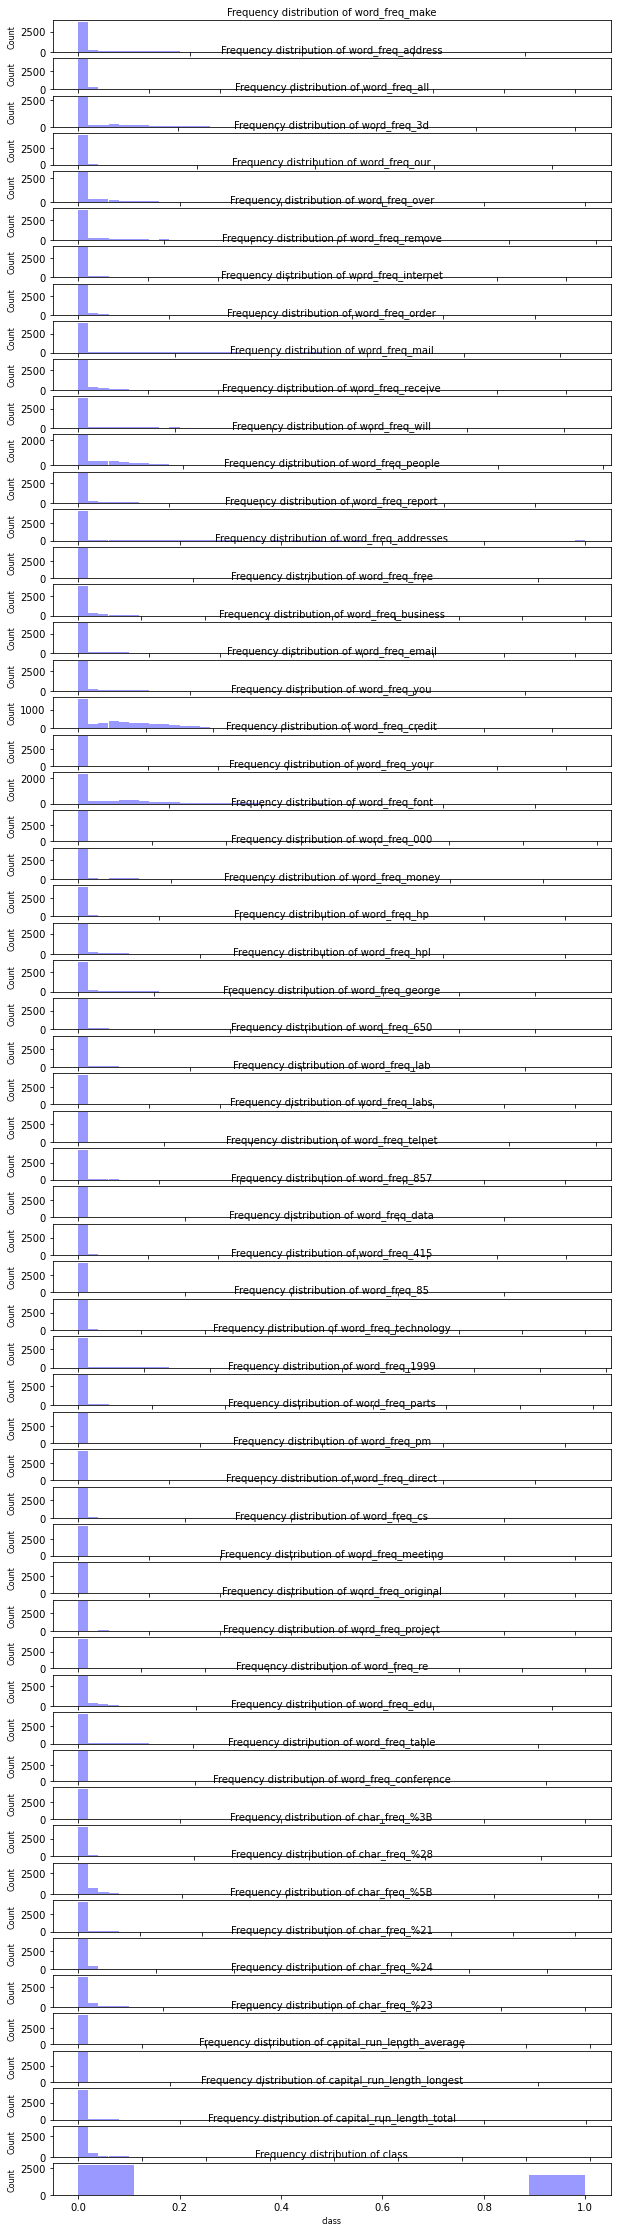

In [133]:
#distribution of the features
import matplotlib.pyplot as plt
import seaborn as sns

col_names = df.columns
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i], kde = False, color = 'blue')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

The distributions do not form a normal distribution

### 4) Baseline Model

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [129]:
# Splitting our dataset
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [132]:
# Fitting our model

LogReg = LogisticRegression()
%time LogReg.fit(X_train, y_train)

Wall time: 176 ms


c:\users\fgakori\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
# Using our model to make a prediction
y_pred = LogReg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(accuracy_score(y_test, y_pred))

[[505  33]
 [ 39 344]]
0.9218241042345277


The baseline model accuracy is 92% which is good for the model. 505+344 were correctly predicted while 33+39 were wrongly predicted.

The baseline model will be used to compare it with the naive bayes perfomance.

### 3) Naive bayes

Naïve Bayes, which is computationally very efficient and easy to implement, is a learning algorithm frequently used in text classification problems.

Multinomial Naïve Bayes considers a feature vector where a given term represents the number of times it appears or very often i.e. frequency. It performs well in text classification problems and it is easy to implement, fast and accurate method of prediction.

###### 80-20 splits

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [83]:
#the x will be all the independent variable while y is the target
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
#split into train(80%) and test(20%)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [75]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
#train the model 
%time nb.fit(X_train, y_train)

Wall time: 12 ms


MultinomialNB()

We've instantiated our multinomial model and printed out the time it has taken. The model is really fast as it has only takes 12ms.

In [76]:
# make class predictions for X_test
y_pred = nb.predict(X_test)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8121606948968513

The model accuracy is at 81% which is good for the model.

In [77]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[454,  84],
       [ 89, 294]], dtype=int64)

454+294 were correctly predicted while 84+89 were wrongly predicted

###### 70-30 splits

In [84]:
#split into train(80%) and test(20%)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [85]:
# Training our model 
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
#train the model 
%time nb.fit(X_train, y_train)

Wall time: 7.99 ms


MultinomialNB()

In [86]:
# make class predictions for X_test
y_pred = nb.predict(X_test)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8095582910934106

In [87]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[699, 123],
       [140, 419]], dtype=int64)

Model accuracy is 80%. 699+419 correctly predicted while 123+140 were wrongly predicted

###### 60-40 splits

In [88]:
#split into train(60%) and test(40%)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.4, random_state=0)

In [89]:
# Training our model
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8098859315589354


In [90]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[952, 145],
       [205, 539]], dtype=int64)

A score of 0.80 is achieved which is good for our model.952+539 were correctly predicted while 145+205 were wrongly predicted

#### Overall perfomance

1) 80-20 splits

score - .8121

2) 70-30 splits

score - .8095

3) 60-40 splits

score - 0.8098

80-20 splits has the highest score.The score reduces at 70-30split and slightly increases at 60-40splits .

In general, the baseline model performs better than the naive bayes model.. The advantage we get when working with naive bayes is that the time it takes for execution is less compared to logistic regression which takes more time.

#### Model perfomance

Implementing feature selection to assess if our model perfoms better.

[0.01159974 0.0111479  0.02666887 0.00250107 0.03231061 0.01402748
 0.05704808 0.01961772 0.01466238 0.01222565 0.02384798 0.01455896
 0.00727479 0.00422051 0.00885529 0.04077301 0.02342125 0.01616622
 0.03320163 0.01007994 0.06509778 0.00868645 0.03952104 0.0250498
 0.03986489 0.01936839 0.02948395 0.00909483 0.00608918 0.01036962
 0.00409664 0.00169162 0.00557159 0.00228113 0.00472211 0.00681147
 0.01742365 0.00127279 0.00591049 0.0031821  0.00354503 0.01203184
 0.00446527 0.00533805 0.01495664 0.02096043 0.00084554 0.00253955
 0.00870418 0.01370661 0.0042838  0.050021   0.05706668 0.00559442
 0.03420041 0.03853025 0.03341172]


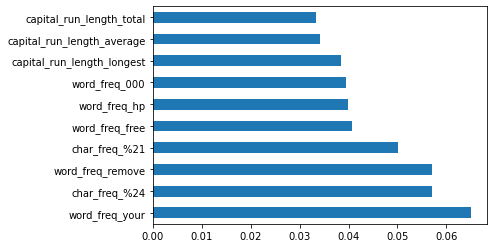

In [92]:
#selecting the top 10 best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

###### 80-20 splits with 10 important features

In [95]:
#X='word_freq_your','char_freq_%24','word_freq_remove','char_freq_%21','word_freq_free','word_freq_hp','word_freq_000',
#'capital_run_length_average','capital_run_length_longest', 'capital_run_length_total',

In [97]:
X = df[['word_freq_your', 'char_freq_%24', 'word_freq_remove', 'char_freq_%21', 'word_freq_free', 'word_freq_hp', 
        'word_freq_000', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']].values
y = df['class'].values

In [98]:
#split into train(80%) and test(20%)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [100]:
# Training our model
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
#train the model 
%time nb.fit(X_train, y_train)

Wall time: 3.96 ms


MultinomialNB()

In [101]:
# make class predictions for X_test
y_pred_class = nb.predict(X_test)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6351791530944625

In [102]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[338, 200],
       [136, 247]], dtype=int64)

Accuracy at 63%. 338+247 correctly predicted, 200+136 wrongly predicted.
The model has performed poorly compared to the first model which has an accuracy of 81%

###### 70-30splits

In [103]:
#split into train(70%) and test(30%)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [104]:
# Training our model
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
#train the model 
%time nb.fit(X_train, y_train)

Wall time: 3.99 ms


MultinomialNB()

In [106]:
# make class predictions for X_test
y_pred_class = nb.predict(X_test)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6408399710354815

In [107]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[529, 293],
       [203, 356]], dtype=int64)

64% accuracy.529+356 correct predictions, 293+203 wrong predictions.
the model has performed poorly compared to the previous one which has a score of 80%

###### 60-40 splits

In [108]:
#split into train(60%) and test(40%)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.4, random_state=0)

In [109]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
#train the model 
%time nb.fit(X_train, y_train)

Wall time: 3.99 ms


MultinomialNB()

In [110]:
# make class predictions for X_test
y_pred_class = nb.predict(X_test)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6534492123845737

In [111]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[735, 362],
       [276, 468]], dtype=int64)

##### Overall perfomance 

1) 80-20 splits

score - .6351

2) 70-30 splits

score - .6408

3) 60-40 splits

score - .6534

When working with the most important features, the model proves to perform poorly compared when working with all the features.

## 4) Conclusion

The baseline model performs best with a score of 92%. Naive bayes scores range from 80-82% and the score increases as we reduces the % of the train set. However, when we use only important features, the model performs poorly with scores ranging from 62-65%. Naive bayes takes less time for execution making it fast to output the results when compared with logistic regression.